In [1]:
import ast

import pandas as pd
from tqdm import tqdm
from igs.igs import iterative_greedy_search_
from prediction.prediction_model import *
from igs.get_true_pf import *
from igs.get_expected_pf import *
from baselines.random_allocation import *

C:\Users\LYue7\anaconda3\envs\llms\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\LYue7\anaconda3\envs\llms\lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [10]:
save_dir = f"output/text_classification"
datasets = ['overruling', 'agnews', 'coqa', 'headlines', 'sciq']
test_data_size = 0.95

In [3]:
def get_single_model_results_(model, df_true_accuracy, df_cost):
    model_column = f'{model}'
    f_accuracy = df_true_accuracy[model_column].sum() / len(df_true_accuracy)
    f_cost = df_cost[model_column].sum()
    return [f_cost, f_accuracy]

0.95
There are 108 train data and  2052 test data


C:\Users\LYue7\anaconda3\envs\llms\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

     gptneox_20B      0.741     0.881     0.805      1450
         gptj_6B      0.766     0.733     0.749      1060
 fairseq_gpt_13B      0.725     0.804     0.763      1269
text-davinci-002      0.948     0.996     0.971      1944
  text-curie-001      0.763     0.960     0.850      1472
   gpt-3.5-turbo      0.904     0.998     0.948      1852
           gpt-4      0.949     1.000     0.974      1947
        j1-jumbo      0.798     0.885     0.839      1573
       j1-grande      0.738     0.871     0.799      1408
        j1-large      0.711     0.930     0.806      1435
          xlarge      0.877     0.981     0.926      1796
          medium      0.737     0.727     0.732      1055

       micro avg      0.816     0.915     0.862     18261
       macro avg      0.805     0.897     0.847     18261
    weighted avg      0.819     0.915     0.863     18261
     samples avg      0.811     0.911     0.840     18261

0.183235867

C:\Users\LYue7\anaconda3\envs\llms\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

     gptneox_20B      0.773     0.797     0.785      3506
         gptj_6B      0.783     0.891     0.833      4787
 fairseq_gpt_13B      0.839     0.933     0.884      5234
text-davinci-002      0.890     0.989     0.937      6417
  text-curie-001      0.755     0.868     0.808      4725
   gpt-3.5-turbo      0.874     0.987     0.927      6299
           gpt-4      0.898     0.991     0.942      6473
        j1-jumbo      0.824     0.982     0.896      5879
       j1-grande      0.773     0.953     0.854      5366
        j1-large      0.742     0.919     0.821      4933
          xlarge      0.850     0.983     0.912      6073
          medium      0.696     0.774     0.733      4328

       micro avg      0.816     0.933     0.871     64020
       macro avg      0.808     0.922     0.861     64020
    weighted avg      0.816     0.933     0.871     64020
     samples avg      0.805     0.900     0.828     64020

0.226869806

C:\Users\LYue7\anaconda3\envs\llms\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LYue7\anaconda3\envs\llms\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

     gptneox_20B      0.241     0.161     0.193      1584
         gptj_6B      0.212     0.163     0.184      1410
 fairseq_gpt_13B      0.230     0.158     0.188      1623
text-davinci-002      0.277     0.189     0.225      1980
  text-curie-001      0.224     0.147     0.178      1419
   gpt-3.5-turbo      0.104     0.077     0.088       613
           gpt-4      0.298     0.205     0.243      2059
        j1-jumbo      0.273     0.198     0.229      1893
       j1-grande      0.268     0.208     0.234      1931
        j1-large      0.235     0.200     0.216      1692
          xlarge      0.238     0.166     0.195      1653
          medium      0.217     0.126     0.160      1355

       micro avg      0.245     0.175     0.204     19212
       macro avg      0.235     0.167     0.194     19212
    weighted avg      0.245     0.175     0.204     19212
     samples avg      0.103     0.085     0.071     19212

0.310826849

C:\Users\LYue7\anaconda3\envs\llms\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LYue7\anaconda3\envs\llms\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

     gptneox_20B      0.838     0.955     0.892      7798
         gptj_6B      0.822     0.955     0.883      7400
 fairseq_gpt_13B      0.778     0.882     0.826      6862
text-davinci-002      0.846     0.971     0.904      7923
  text-curie-001      0.780     0.903     0.837      6639
   gpt-3.5-turbo      0.828     0.957     0.888      7709
           gpt-4      0.874     0.971     0.920      8186
        j1-jumbo      0.842     0.962     0.898      7839
       j1-grande      0.808     0.931     0.865      7449
        j1-large      0.823     0.917     0.867      7130
          xlarge      0.824     0.920     0.870      7452
          medium      0.824     0.932     0.875      7541

       micro avg      0.825     0.939     0.879     89928
       macro avg      0.824     0.938     0.877     89928
    weighted avg      0.825     0.939     0.879     89928
     samples avg      0.807     0.894     0.822     89928

0.421052631

C:\Users\LYue7\anaconda3\envs\llms\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LYue7\anaconda3\envs\llms\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

     gptneox_20B      0.697     0.860     0.770      7553
         gptj_6B      0.672     0.823     0.740      7218
 fairseq_gpt_13B      0.668     0.805     0.730      7179
text-davinci-002      0.712     0.894     0.793      7864
  text-curie-001      0.638     0.741     0.686      6845
   gpt-3.5-turbo      0.615     0.737     0.671      6649
           gpt-4      0.712     0.900     0.795      7800
        j1-jumbo      0.693     0.871     0.772      7557
       j1-grande      0.710     0.863     0.779      7673
        j1-large      0.680     0.837     0.750      7344
          xlarge      0.726     0.898     0.803      7903
          medium      0.663     0.876     0.755      7190

       micro avg      0.684     0.845     0.756     88775
       macro avg      0.682     0.842     0.754     88775
    weighted avg      0.684     0.845     0.756     88775
     samples avg      0.668     0.713     0.647     88775

0.168649720

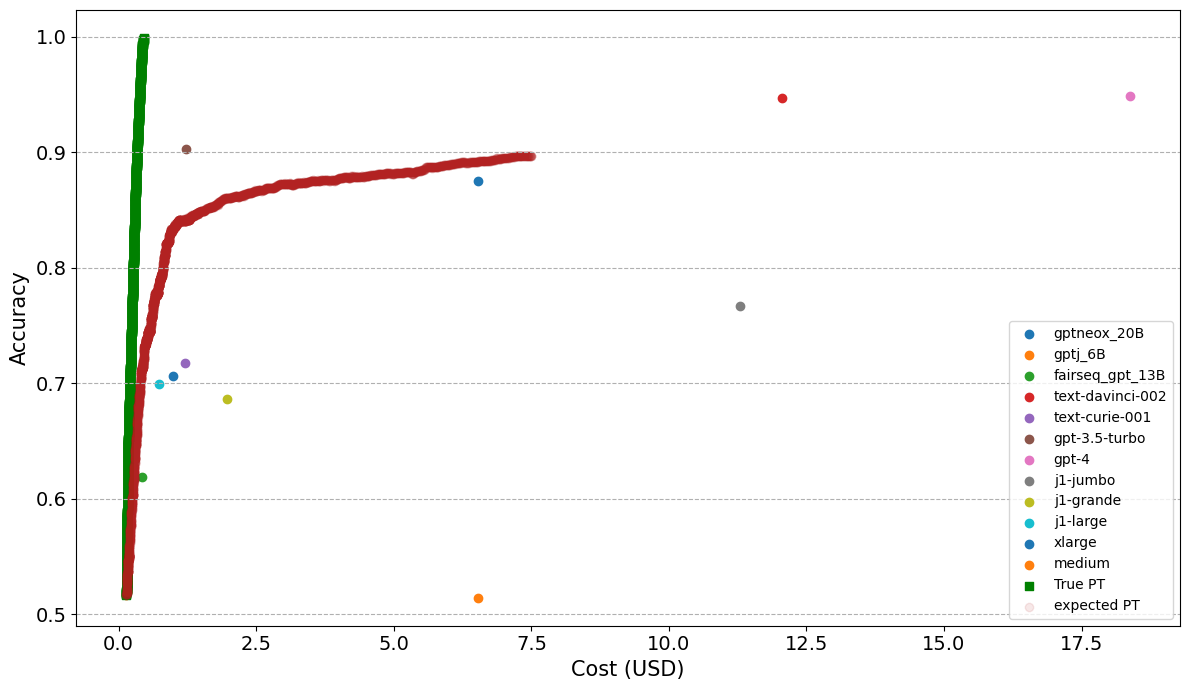

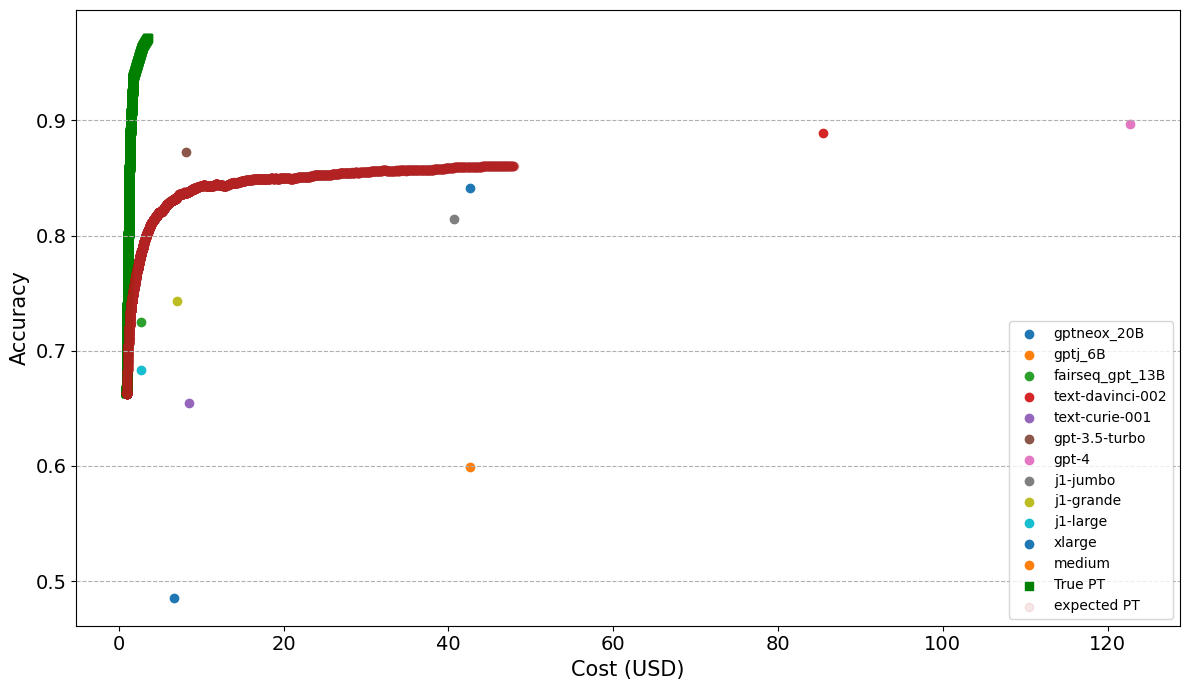

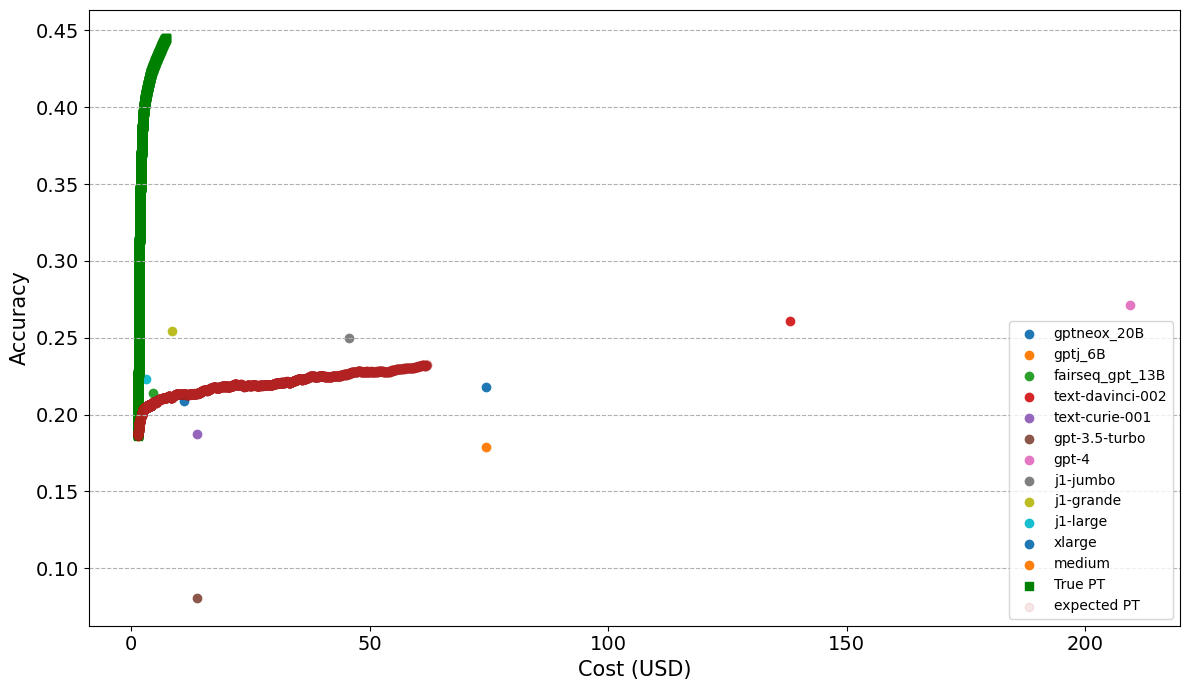

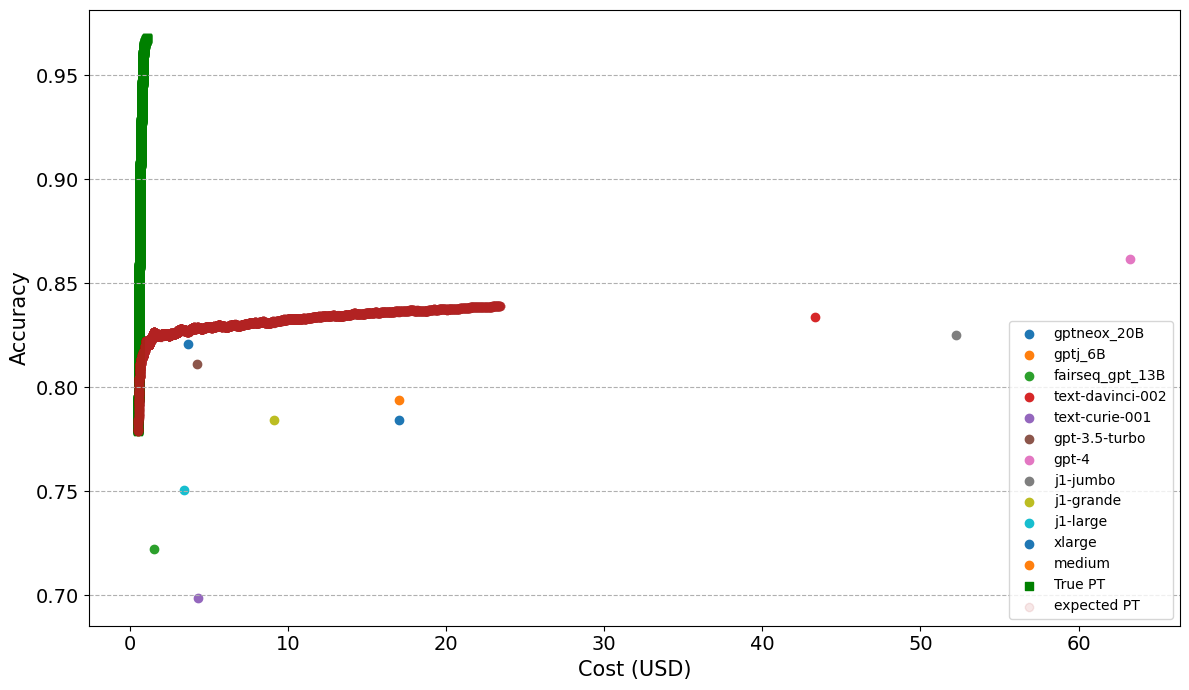

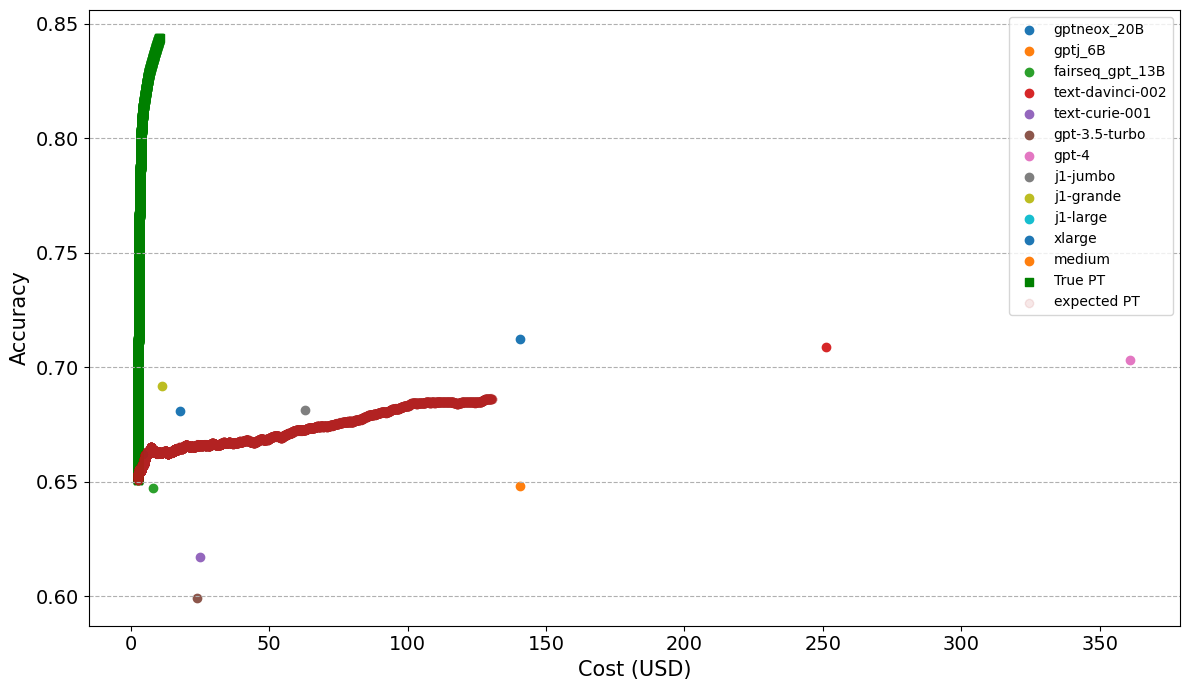

In [11]:
for dataset in datasets:
    data_dir = f"datasets/text_classification/{dataset}_content_word2vec.pkl"
    model_list = ['gptneox_20B', 'gptj_6B', 'fairseq_gpt_13B', 'text-davinci-002', 'text-curie-001', 'gpt-3.5-turbo',
                      'gpt-4', 'j1-jumbo', 'j1-grande', 'j1-large', 'xlarge', 'medium']


    df_pre_accuracy, df_true_accuracy, df_cost = data_preprocess(data_dir, model_list, test_size=test_data_size)

    print(f"Processing {dataset} dataset, including", len(df_pre_accuracy), "jobs")

    single_model_res = {}
    for i in range(len(model_list)):
        single_model_res[model_list[i]] = get_single_model_results_(model_list[i], df_true_accuracy, df_cost)

    if os.path.exists(f"{save_dir}/{dataset}_{test_data_size}/{dataset}_true_pt.csv"):
        true_pt = pd.read_csv(f"{save_dir}/{dataset}_{test_data_size}/{dataset}_true_pt.csv")
    else:
        true_pt, true_pt_solution = get_true_pareto_front(df_true_accuracy, df_cost, model_list).run()
        true_pt.to_csv(f"{save_dir}/{dataset}_{test_data_size}/{dataset}_true_pt.csv")
      
    if os.path.exists(f"{save_dir}/{dataset}_{test_data_size}/{dataset}_expected_pt.csv"):
        expected_pt = pd.read_csv(f"{save_dir}/{dataset}_{test_data_size}/{dataset}_expected_pt.csv")
    else:
        expected_pt, expected_pt_solution = get_expected_pareto_front(df_pre_accuracy, df_true_accuracy, df_cost, model_list).run()
        expected_pt.to_csv(f"{save_dir}/{dataset}_{test_data_size}/{dataset}_expected_pt.csv")
        

    fig = plt.figure(figsize=(12, 7))
    font = {  # 'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 15,
    }
    for key, value in single_model_res.items():
        plt.scatter(value[0], value[1], alpha=1, label=key)

    plt.scatter(true_pt['cost'], true_pt["true_accuracy"], alpha=1, marker="s", c="green",label='True PT')

    plt.scatter(expected_pt['cost'], expected_pt["true_accuracy"], alpha=0.1, c="firebrick", label='expected PT')

    plt.xlabel('Cost (USD)', fontdict=font)
    plt.ylabel('Accuracy', fontdict=font)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(zorder=0, linestyle='--', axis='y')
    plt.legend()
    # lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.47, -0.13), ncol=7, fontsize=12)
    plt.tight_layout()
    # plt.show()
    fig.savefig(f"{save_dir}/{dataset}_{test_data_size}/Comparison_{dataset}.png", dpi=500)
